In [3]:
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library import PhaseOracle
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

#
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

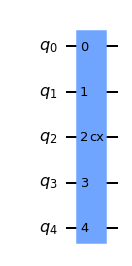

In [36]:
oracle = QuantumCircuit(5,name='oracle')
op=np.identity(32)
for i in range(32):
    #print(str(bin(i)).zfill(7),str(bin(i)).zfill(7)[2:4])
    if str(bin(i)).zfill(7)[2:4]=='11':
        if str(bin(i)).zfill(7)[-3:]=='110':
            op[i][i]=-op[i][i]
        elif str(bin(i)).zfill(7)[-3]=='0' or str(bin(i)).zfill(8)[-3]=='b':
            op[i][i]=-op[i][i]
cx = Operator(op)
oracle.unitary(cx, [0, 1,2,3,4], label='cx')
oracle.draw("mpl")

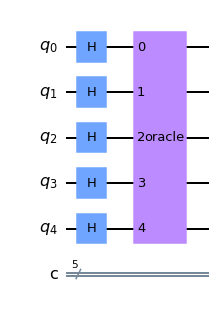

In [37]:
# Configure backend
backend = Aer.get_backend('statevector_simulator')
grover_circ= QuantumCircuit(5,5)
grover_circ.h([0,1,2,3,4])
grover_circ.append(oracle,[0,1,2,3,4])
grover_circ.draw("mpl")

In [38]:
job=execute(grover_circ,backend)
result = job.result()

In [39]:
sv = result.get_statevector()
np.around(sv,3)

array([ 0.177+0.j,  0.177+0.j,  0.177+0.j,  0.177+0.j,  0.177+0.j,
        0.177+0.j,  0.177+0.j,  0.177+0.j,  0.177+0.j,  0.177+0.j,
        0.177+0.j,  0.177+0.j,  0.177+0.j,  0.177+0.j,  0.177+0.j,
        0.177+0.j,  0.177+0.j,  0.177+0.j,  0.177+0.j,  0.177+0.j,
        0.177+0.j,  0.177+0.j,  0.177+0.j,  0.177+0.j, -0.177+0.j,
       -0.177+0.j, -0.177+0.j, -0.177+0.j,  0.177+0.j,  0.177+0.j,
       -0.177+0.j,  0.177+0.j])

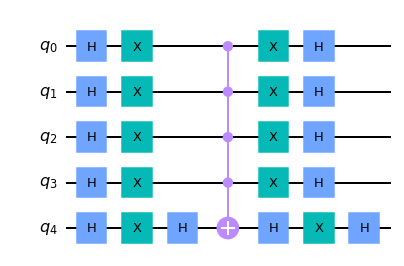

In [40]:
reflection = QuantumCircuit(5,name='reflection')
reflection.h([0,1,2,3,4])
reflection.x([0,1,2,3,4])
reflection.h([4])
reflection.mct(list(range(4)), 4) 
reflection.h(4)
reflection.x([0,1,2,3,4]) 
reflection.h([0,1,2,3,4]) 
reflection.draw("mpl")

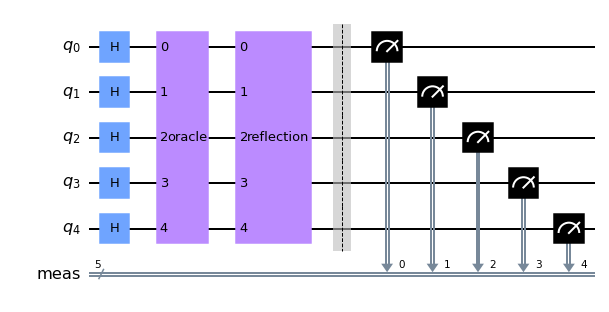

In [41]:
grover_circuit = QuantumCircuit(5)
grover_circuit.h([0,1,2,3,4])
for i in range(1):
    grover_circuit.append(oracle, [0,1,2,3,4])
    grover_circuit.append(reflection, [0,1,2,3,4])
grover_circuit.measure_all()
grover_circuit.draw("mpl")

In [45]:
aer_sim = Aer.get_backend('statevector_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
print(result.get_statevector())

Statevector([ 0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j],
            dims=(2, 2, 2, 2, 2))


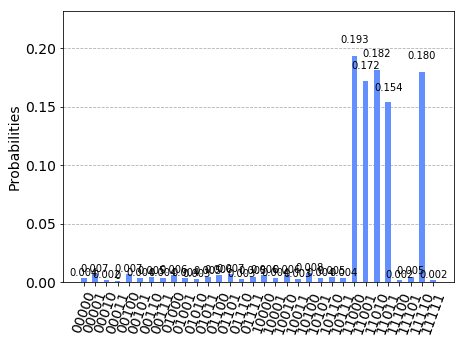

In [46]:
plot_histogram(counts)